In [ ]:
theta20 = [1000, 22000, 4e-4, 0.006]
theta20min = [10, 18000, 1e-4, 0.0008]
theta20max = [2000, 30000, 1e-3, 0.008]
theta20maxs = [max_val / theta for max_val, theta in zip(theta20max, theta20)]
theta20mins = [min_val / theta for min_val, theta in zip(theta20min, theta20)]

In [ ]:
system = {
    'tvi': {  # Time-variant input variables (models input: tvi), each key is a symbol nad key in tvi as well
        'T': {  # Temperature (K)
            'stps': 3,  # Number of switching times in CVPs (vector parametrisation resolution in time dimension):
            # Must be a positive integer > 1. swps-1 is the number of steps
            'const': 'dec',  # Constraint type: relative state of signal levels in CVPs
            # 'rel' (relative) ensures relaxation, 'dec' (decreasing) ensures decreasing signal levels, 'inc' (increasing) ensures increasing signal levels
            'max': 358.15,  # Maximum allowable signal level, des_opt space upper bound
            'min': 298.15,  # Minimum allowable signal level, des_opt space lower bound
            'cvp': 'LPF',  # Design CVP method (CPF - constant profile, LPF - linear profile)
            'offl': 5,  # minimum allowed perturbation of signal (ratio)
            'offt': 300  # minimum allowed perturbation of time (ratio)
        },
        'P': {  # Pressure (bar)
            'stps': 3,
            'const': 'rel',
            'max': 0.18,
            'min': 0.05,
            'cvp': 'CPF',
            'offl': 0.1,
            'offt': 300
        }
    },
    'tvo': {  # Time-variant output variables (responses, measured or unmeasured)
        'y1': {  # response variable, here carbonation efficiency
            'init': 0.001,  # Initial value for the response variable, it can be a value, or 'variable' for case it is a des_opt decision (time-invariant input variable)
            'meas': True,  # Flag indicating if this variable is directly measurable, if False, it is a virtual output
            'sp': 5,  # the amound of samples per each round (run)
            'unc': 0.1,  # amount of noise (standard deviation) in the measurement, in case of insilico, this is used for simulating a normal distribution of noise to measurement (only measurement)
            'offt': 150,  # minimum allowed perturbation of sampling times (ratio)
            'samp_s': 1,  # Matching criterion for models prediction and data alignment
            'samp_f': [0, 1500],  # fixed sampling times
        },
        'y2': {  # response variable, here carbonation efficiency
            'init': 0.001,
            # Initial value for the response variable, it can be a value, or 'variable' for case it is a des_opt decision (time-invariant input variable)
            'meas': True,
            # Flag indicating if this variable is directly measurable, if False, it is a virtual output
            'sp': 5,  # the amound of samples per each round (run)
            'unc': 0.1,
            # amount of noise (standard deviation) in the measurement, in case of insilico, this is used for simulating a normal distribution of noise to measurement (only measurement)
            'offt': 150,  # minimum allowed perturbation of sampling times (ratio)
            'samp_s': 2,  # Matching criterion for models prediction and data alignment
            'samp_f': [0, 1500],  # fixed sampling times
        },
    },
    'tii': {  # Time-invariant input variables (tii)
        'slr': {  # 1st symbolic time-invariant control, Density of solid reactant (kg/m³)
            'max': 0.2,  # Maximum allowable signal level, des_opt space upper bound
            'min': 0.05  # Minimum allowable signal level, des_opt space upper bound
        },
        'aps': {  # 2nd symbolic time-invariant control, Fraction of active CaO in mineral wt%
            'max': 500,  # Maximum allowable signal level, des_opt space upper bound
            'min': 150  # Minimum allowable signal level, des_opt space upper bound
        },
    },
    'tio': {  # Time-invariant output variables (empty here, could hold steady state responses that hold no dependency)
    },
    't_s': [150, 7050],  # Time span  (600 s to 10,800 s), duration of numerical perturbations (the rest is precluded from des_opt)
    't_r': 15,  # Time resolution (10 s), minimum time steps for the simulation/des_opt/controls
    't_d': 150
}

In [ ]:
models = { # Settings related to the rival models and their parameters
    'can_m': ['f20'],  # Active solvers (rival models) to be used in the experiment
    'krt': {'f20': 'pys'},
    # type of the model interface, 'pym' for middoe.krnl_models, 'gpr' for gPAS models, function name for globally defined functions, 'pys' for python standalone scripts
    'creds': {'f20': '@@TTmnoa698'},
    # credentials for gPAS models, if not needed, leave empty
    'src': {'f20': 'C:/Users/Tadmin/PycharmProjects/tutorialmid1/semiconwet/ipy/model_semiconwet.py'},

    # for now for gPAS readable files, or python standalone scripts

    'theta': { # Theta parameters for each models
        'f20': theta20,
    },
    't_u': { # Maximum bounds for theta parameters (based on normalized to'f20': theta20mins, 1)
        'f20': theta20maxs,
    },
    't_l': { # Minimum bounds for theta parameters (based on normalized to 1)
        'f20': theta20mins,
    },
}

In [ ]:
gsa = { # Settings for the Global Sensitivity Analysis (gsa)
    'var_s': True,  # Perform sensitivity analysis for variables
    'par_s': False,  # Perform sensitivity analysis for parameters
    'var_d': False, # feasible space for variables, fload ratio: use as multiplier to nominals uniformly (e.g. 1.1), False: use system defined space
    'par_d': False,   # feasible space for parameters, fload ratio: use as multiplier to nominals uniformly(e.g. 1.1), False: use models defined space
    'samp': 2 ** 6,  # Sampling size for gsa, always 2**n
    'multi': 0.7,  # Perform gsa in parallel
    'tii_n': [0.1, 300], # Nominal values for the time-invariant variables
    'tvi_n': [300, 0.1], # Nominal values for the time-variant variables
    'plt': True,  # Plot the results
}

Running GSA-Sobol for model: f20 in parallel


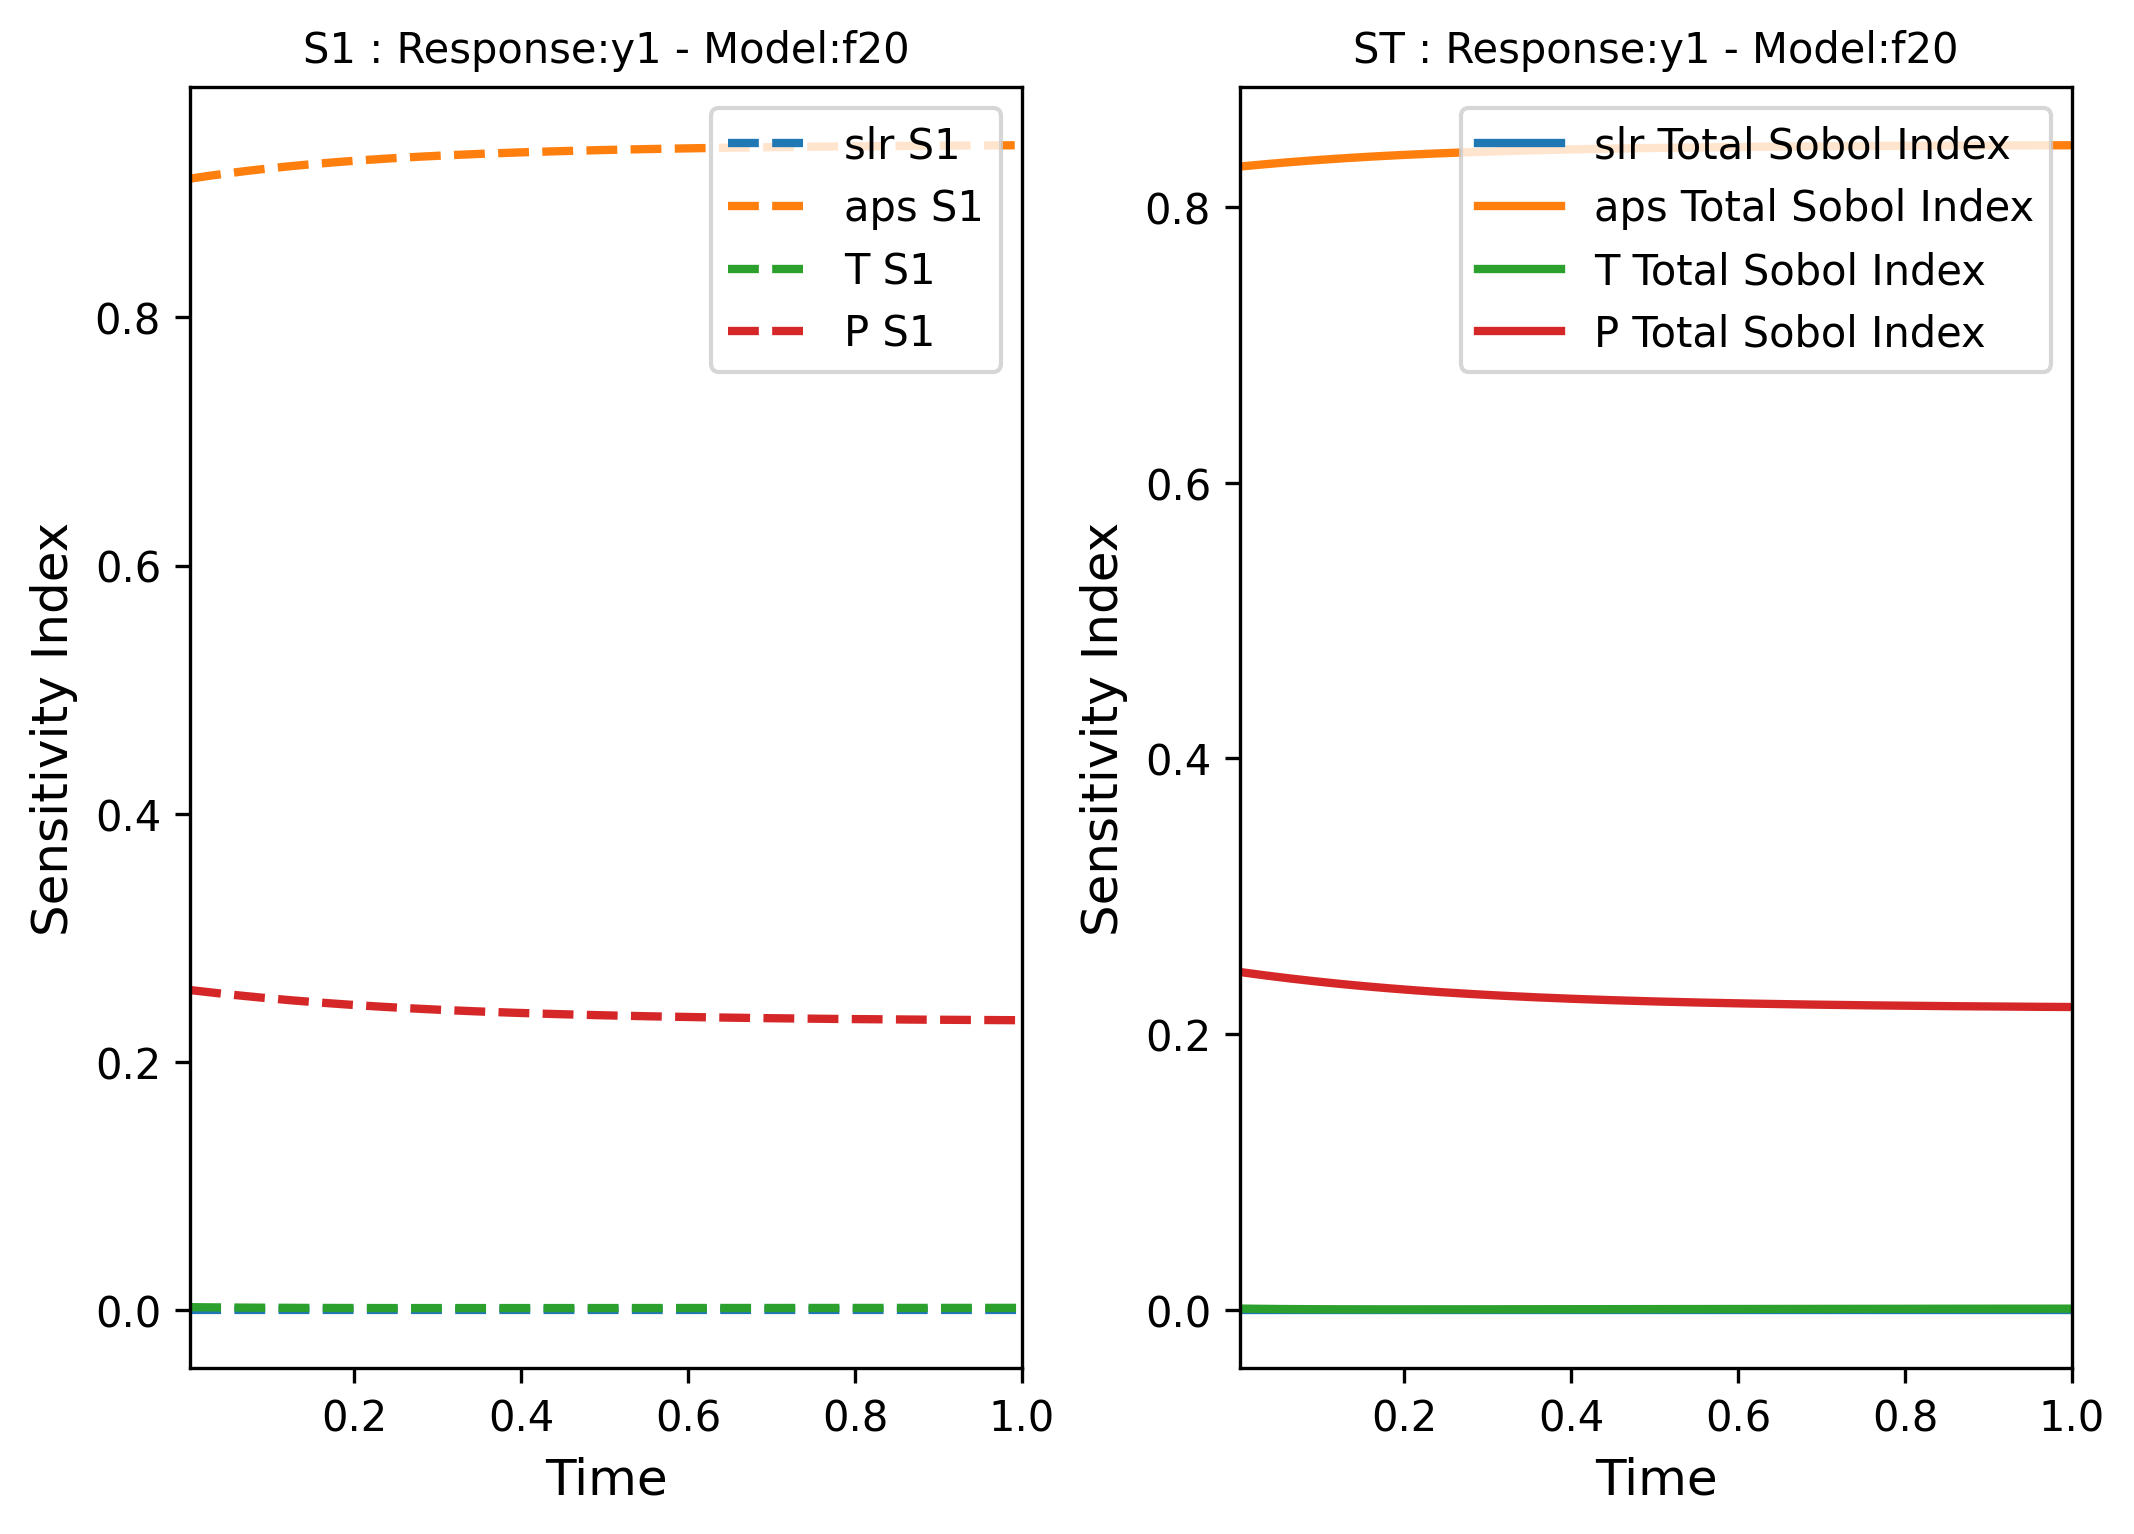

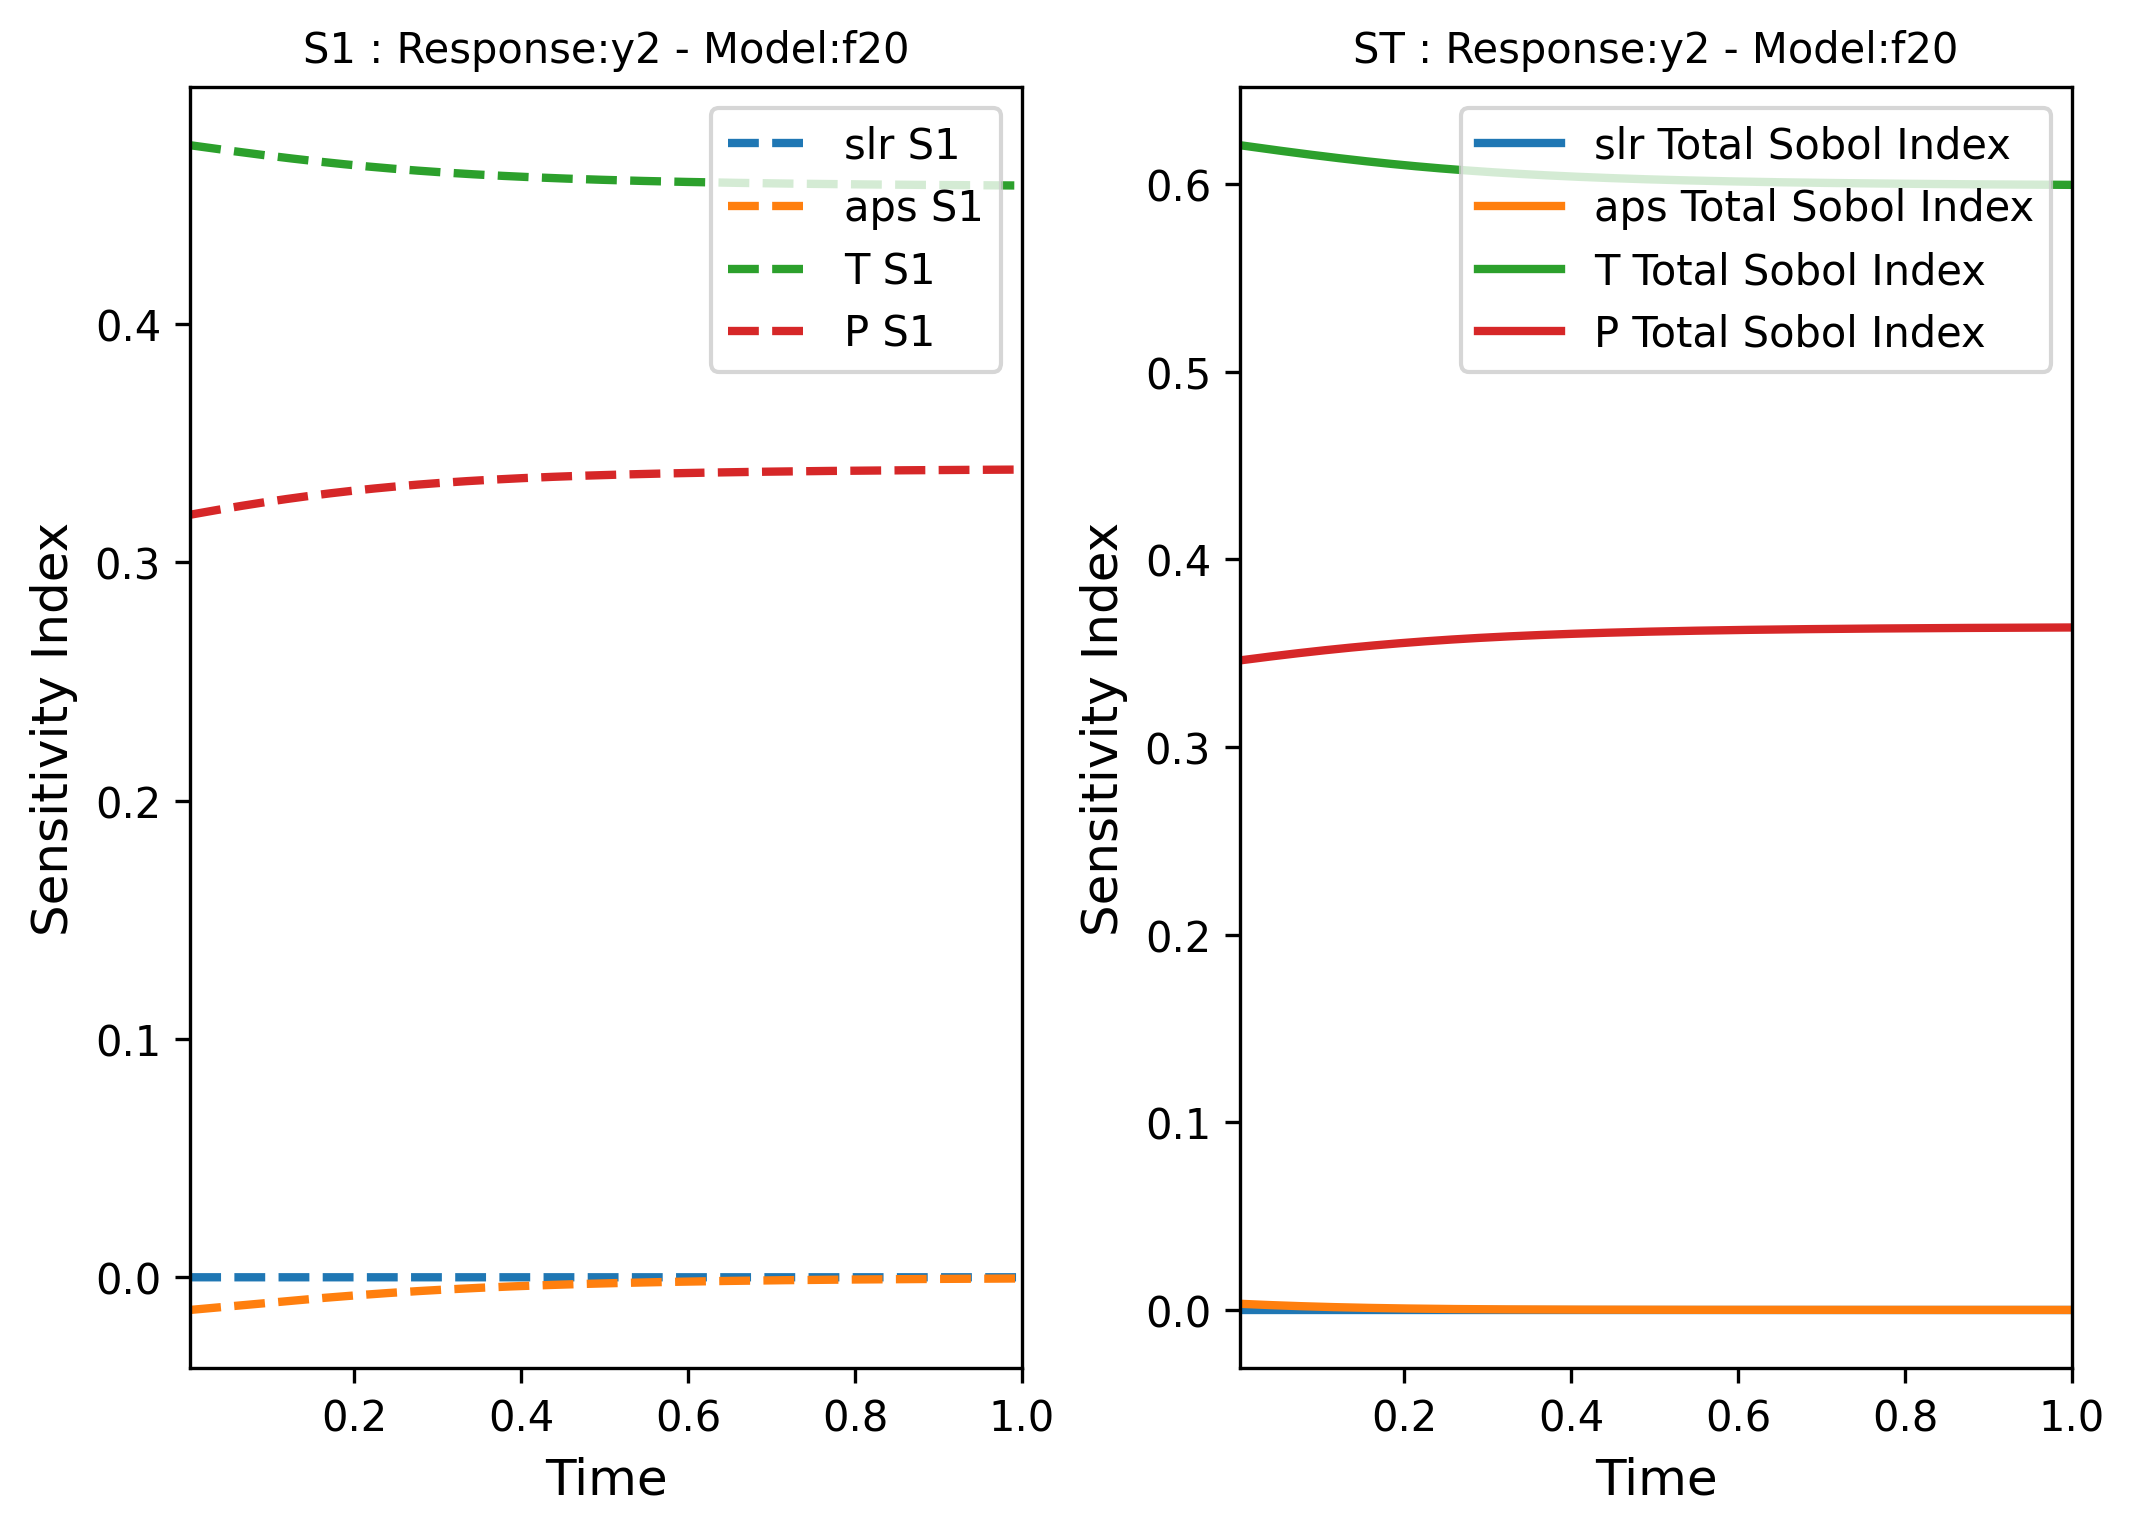

In [6]:
from middoe.sc_sensa import sensa
sobol_results = sensa(gsa, models, system)

In [7]:
from middoe.log_utils import save_to_jac
save_to_jac(sobol_results, purpose="sensa")

[INFO] Results saved to: C:\Users\Tadmin\PycharmProjects\tutorialmid1\semiconwet\ipy\sensa_results.jac


In [8]:
from middoe.log_utils import load_from_jac, save_to_xlsx

results = load_from_jac()
sensa = results['sensa']
save_to_xlsx(sensa)

File not found: iden_results.jac
Loaded: sensa_results.jac
Sobol results saved to: C:\Users\Tadmin\PycharmProjects\tutorialmid1\semiconwet\ipy\sobol_results.xlsx


In [9]:
insilicos = { # Settings for the insilico data generation
    'tr_m': 'f20', # selected true models (with nominal values)
    'prels': { # classic des_opt settings, sheet name is the round run name, each sheet contains the data for the round, iso space.
        '1': {'T': 308.15, 'P': 0.1, 'aps': 200, 'slr': 0.1},
        '2': {'T': 338.15, 'P': 0.1, 'aps': 200, 'slr': 0.1},
        # '3': {'T': 338.15, 'P': 0.17, 'aps': 350, 'slr': 0.1},
        # '4': {'T': 353.15, 'P': 1, 'rho': 3191, 'cac': 44.93, 'aps': 5.5e-5, 'mld': 36000}
    }
}

In [10]:
from middoe.krnl_expera import expera
expera(system, models, insilicos, design_decisions={}, expr=1)


[✓] In-silico data saved to: C:\Users\Tadmin\PycharmProjects\tutorialmid1\semiconwet\ipy\indata.xlsx
[INFO] Model used         : f20
[INFO] Design case        : classic/preliminary
[INFO] Responses simulated:
   - y1         | measurable      | std.dev = 0.1
   - y2         | measurable      | std.dev = 0.1


(WindowsPath('C:/Users/Tadmin/PycharmProjects/tutorialmid1/semiconwet/ipy/indata.xlsx'),
      MES_X:y1  MES_Y:y1  MES_X:y2    MES_Y:y2   X:all  slr    aps       T  \
 0         0.0  0.000000       0.0    0.000000     0.0  0.1  200.0  308.15   
 1      1755.0  0.332787    1755.0  102.198968    15.0  0.1  200.0  308.15   
 2      3525.0  0.415246    3525.0  141.596039    30.0  0.1  200.0  308.15   
 3      5280.0  0.424411    5280.0  109.084365    45.0  0.1  200.0  308.15   
 4      7050.0  0.483677    7050.0  115.993742    60.0  0.1  200.0  308.15   
 ..        ...       ...       ...         ...     ...  ...    ...     ...   
 466       NaN       NaN       NaN         NaN  6990.0  0.1  200.0  308.15   
 467       NaN       NaN       NaN         NaN  7005.0  0.1  200.0  308.15   
 468       NaN       NaN       NaN         NaN  7020.0  0.1  200.0  308.15   
 469       NaN       NaN       NaN         NaN  7035.0  0.1  200.0  308.15   
 470       NaN       NaN       NaN         NaN  7050.

In [11]:
from middoe.krnl_expera import expera
expera(system, models, insilicos, design_decisions={}, expr=2)


[✓] In-silico data saved to: C:\Users\Tadmin\PycharmProjects\tutorialmid1\semiconwet\ipy\indata.xlsx
[INFO] Model used         : f20
[INFO] Design case        : classic/preliminary
[INFO] Responses simulated:
   - y1         | measurable      | std.dev = 0.1
   - y2         | measurable      | std.dev = 0.1


(WindowsPath('C:/Users/Tadmin/PycharmProjects/tutorialmid1/semiconwet/ipy/indata.xlsx'),
      MES_X:y1  MES_Y:y1  MES_X:y2   MES_Y:y2   X:all  slr    aps       T    P  \
 0         0.0  0.000000       0.0   0.000000     0.0  0.1  200.0  338.15  0.1   
 1      1755.0  0.364994    1755.0  46.455960    15.0  0.1  200.0  338.15  0.1   
 2      3525.0  0.433958    3525.0  61.509502    30.0  0.1  200.0  338.15  0.1   
 3      5280.0  0.504197    5280.0  56.677460    45.0  0.1  200.0  338.15  0.1   
 4      7050.0  0.542499    7050.0  51.473182    60.0  0.1  200.0  338.15  0.1   
 ..        ...       ...       ...        ...     ...  ...    ...     ...  ...   
 466       NaN       NaN       NaN        NaN  6990.0  0.1  200.0  338.15  0.1   
 467       NaN       NaN       NaN        NaN  7005.0  0.1  200.0  338.15  0.1   
 468       NaN       NaN       NaN        NaN  7020.0  0.1  200.0  338.15  0.1   
 469       NaN       NaN       NaN        NaN  7035.0  0.1  200.0  338.15  0.1   
 470     

In [12]:
iden_opt = { # Settings for the parameter estimation process
    'meth': 'Ls',  # optimisation method, 'G': Global Differential Evolution, 'Ls': Local SLSQP, 'Ln': Local Nelder-Mead
    'init': None,   # use 'rand' to have random starting point and use None to start from theta_parameters nominal values (to be avoided in insilico studies)
    'eps': 1e-3,  # perturbation size of parameters in SA FDM method (in a normalized to 1 space)
    #usually 1e-3, or None to perform a mesh independency test, and auto adjustment
    'ob': 'WLS',  #loss function, 'LS': least squares, 'MLE': maximum likelihood, 'Chi': chi-square, 'WLS': weighted least squares
    'c_plt': True, # plot the confidence volumes
    'f_plt': True, # plot the fitting results
    'plt_s': True, # show plots while saving
    'log': True # log the results
}

In [13]:
from middoe.log_utils import  read_excel
data = read_excel('indata')

[INFO] Reading from indata.xlsx


In [14]:
from middoe.iden_parmest import parmest
resultpr = parmest(system, models, iden_opt, data)

Objective function: 'WLS'| model 'f20' | CPU time 0.1246 seconds.
Objective function: 'WLS'| model 'f20' | CPU time 0.1126 seconds.
Objective function: 'WLS'| model 'f20' | CPU time 0.1016 seconds.
Objective function: 'WLS'| model 'f20' | CPU time 0.0977 seconds.
Objective function: 'WLS'| model 'f20' | CPU time 0.1010 seconds.
parameter estimation for model f20 concluded- success: True



In [15]:
from middoe.iden_uncert import uncert
uncert_results = uncert(data, resultpr, system, models, iden_opt)
resultun = uncert_results['results']
theta_parameters = uncert_results['theta_parameters']
solver_parameters = uncert_results['solver_parameters']
scaled_params = uncert_results['scaled_params']
obs = uncert_results['obs']


Estimated parameters of f20: [1000.0, 22000.0, 0.0004, 0.006]
True parameters of f20: [1000, 22000, 0.0004, 0.006]
LS objective function value for f20: 0.9616092137593124
T-values of model f20: [0.2900304  2.48297966 1.29640662 1.68665675]
P-value of model:f20 is 100.0 for model discrimination
R2 values for responses in model f20:
  y1: 0.9754
  y2: 0.9587


In [ ]:
from middoe.sc_estima import estima
j = 2
ranking, k_optimal_value, rCC_values, J_k_values = estima(resultun, system, models, iden_opt, j, data)

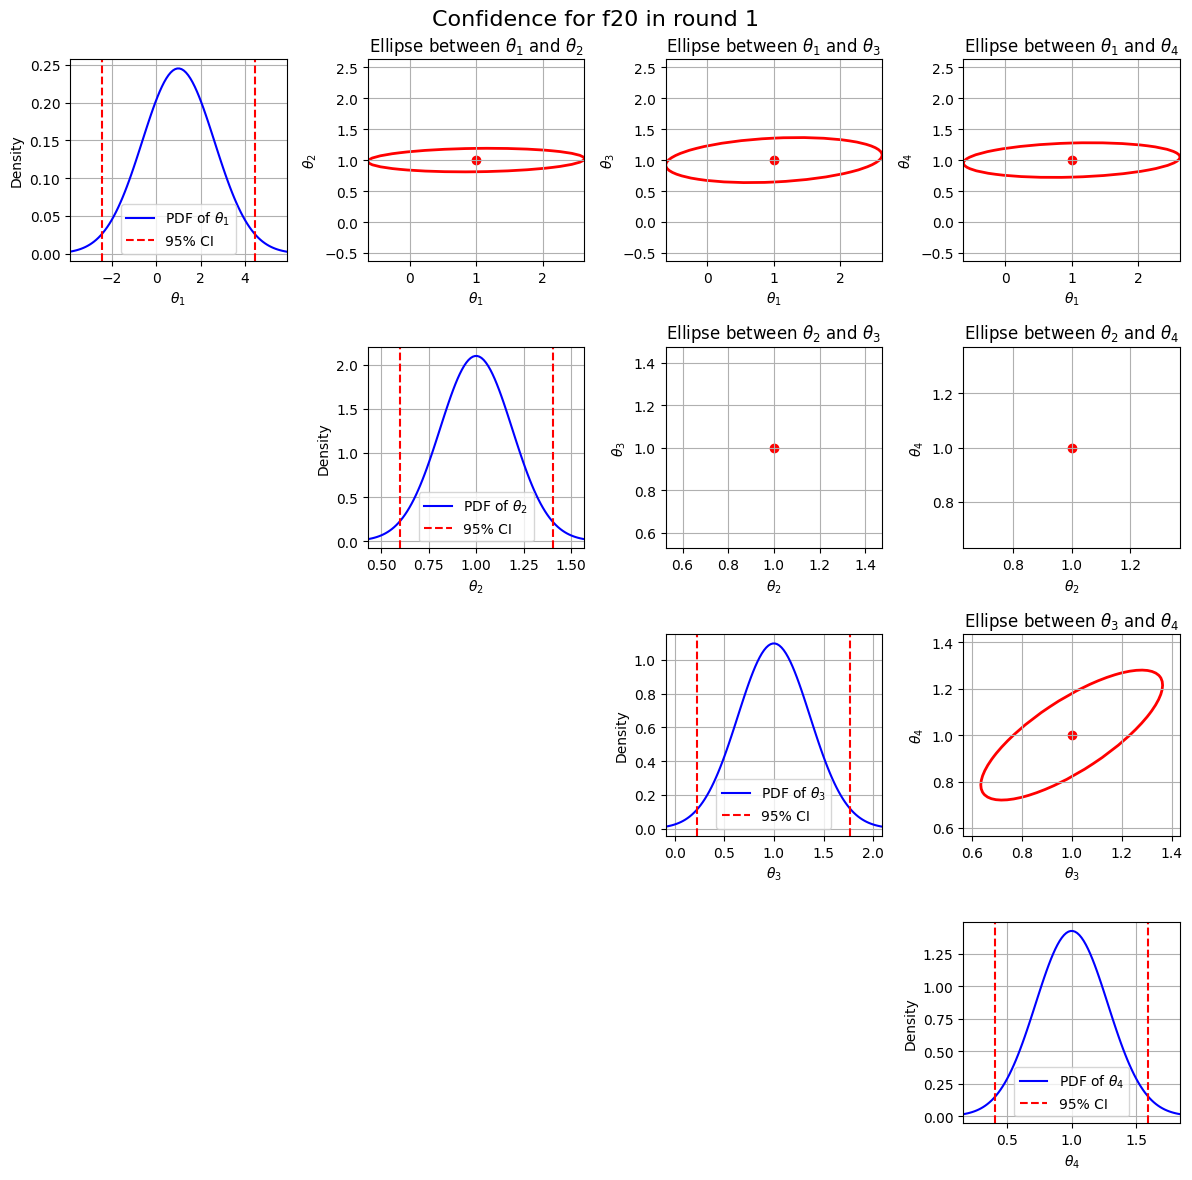

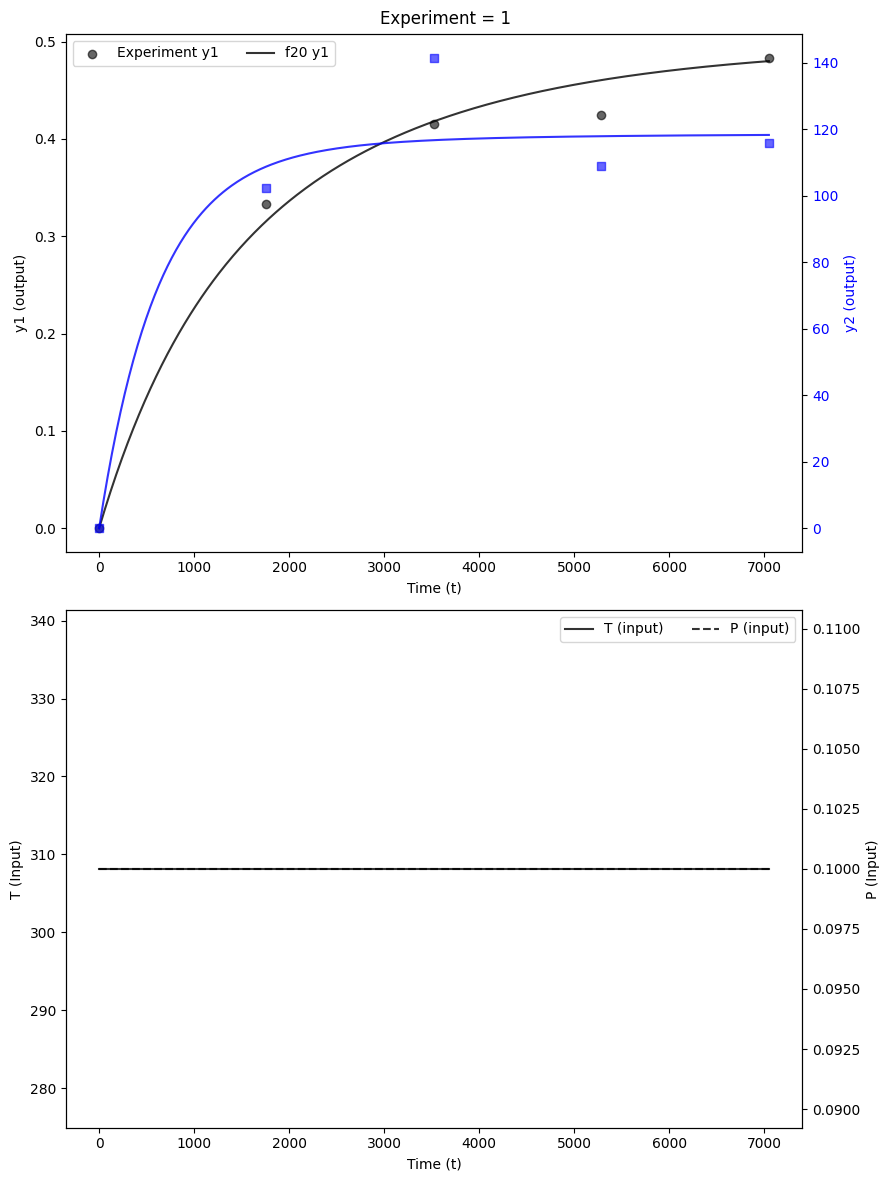

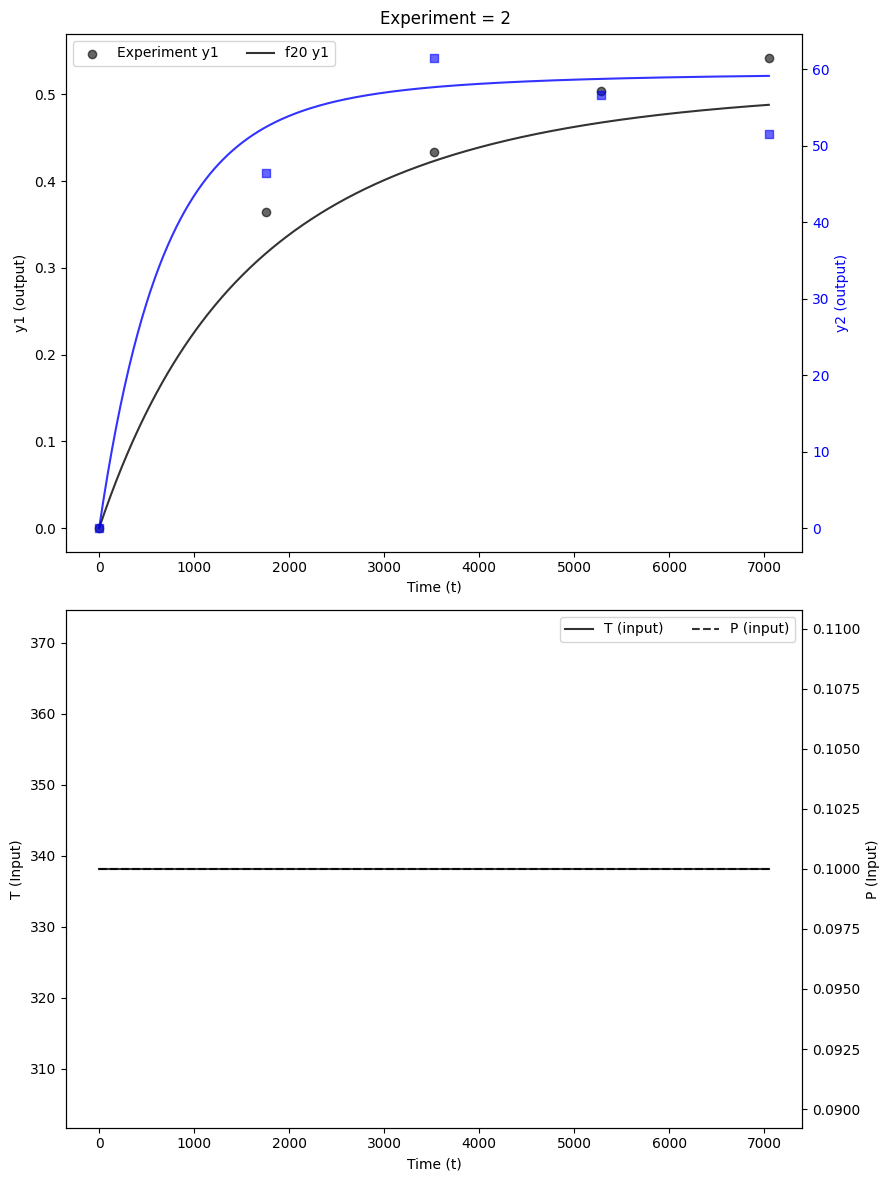

reference t value for model f20 and round 1: 2.119905299221011
estimated t values for model f20 and round 1: [0.2900304  2.48297966 1.29640662 1.68665675]
P-value for model f20 and round 1: 100.0
eps for model f20 and round 1: 0.001



{'f20': np.float64(2.119905299221011)}

In [16]:
from middoe.log_utils import  read_excel, save_rounds
round_data={}
round = 1
save_rounds(round, resultun, theta_parameters, 'preliminary', round_data, models, scaled_params,iden_opt,solver_parameters, obs, data, system)

In [17]:
des_opt = { # Design settings for the experiment
    'eps': 1e-3, #perturbation size of parameters in SA FDM method (in a normalized to 1 space)
    'md_ob': 'HR',     # MD optimality criterion, 'HR': Hunter and Reiner, 'BFF': Buzzi-Ferraris and Forzatti
    'pp_ob': 'E',  # PP optimality criterion, 'D', 'A', 'E', 'ME'
    'plt': True,  # Plot the results
    'itr': {
        'pps': 50, # population size
        'maxmd': 10, # maximum number of MD runs
        'tolmd': 1, # tolerance for MD optimization
        'maxpp':10 ,# maximum number of PP runs
        'tolpp': 1, # tolerance for PP optimization
    }
}

In [18]:
from middoe.des_pp import mbdoe_pp
designs = mbdoe_pp(des_opt, system, models, round=2, num_parallel_runs=20)

In [ ]:
expera(system, models, insilicos, designs, expr=3, swps=designs['swps'])

In [ ]:
data = read_excel('indata')

In [ ]:
resultpr = parmest(system, models, iden_opt, data)

In [ ]:
uncert_results = uncert(data, resultpr, system, models, iden_opt)
resultun = uncert_results['results']
theta_parameters = uncert_results['theta_parameters']
solver_parameters = uncert_results['solver_parameters']
scaled_params = uncert_results['scaled_params']
obs = uncert_results['obs']

In [ ]:
round = 2
save_rounds(round, resultun, theta_parameters, 'MBDOE_PP', round_data, models, scaled_params, iden_opt,
            solver_parameters, obs, data, system)

In [ ]:
save_to_jac(round_data, purpose="iden")


In [ ]:
from middoe.iden_valida import validation
R2_prd, R2_val, parameters = validation(data, system, models, iden_opt,round_data)

In [ ]:
results = load_from_jac()
iden = results['iden']

In [ ]:
from middoe.iden_utils import run_postprocessing
run_postprocessing(
    round_data=results['iden'],
    solvers=['f20', 'f21'],
    selected_rounds=[ 1, 2, 3],
    plot_global_p_and_t=True,
    plot_confidence_spaces=True,
    plot_p_and_t_tests=True,
    export_excel_reports=True,
    plot_estimability=True
)